In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)

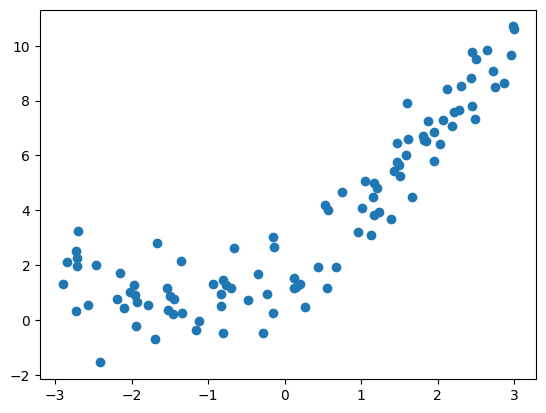

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score

r2_score(y_train, model.predict(X_train))

0.7741992892818306

In [8]:
r2_score(y_test, model.predict(X_test))

0.40719520751871885

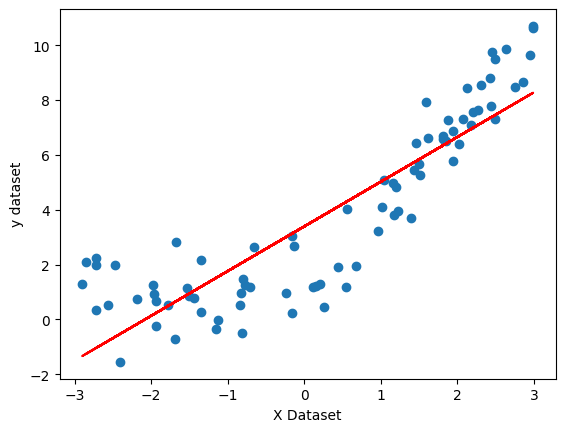

In [9]:
plt.plot(X_train, model.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("y dataset")
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [12]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [13]:
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)



LinearRegression()

In [14]:
r2_score(y_train, model2.predict(X_train_poly))

0.9181196879415248

In [15]:
r2_score(y_test, model2.predict(X_test_poly))

0.8279113850546898

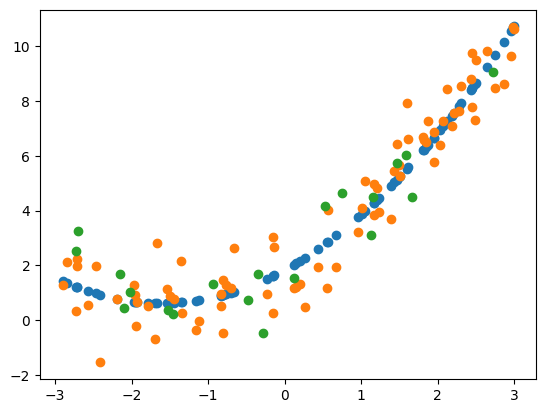

In [16]:
plt.scatter(X_train, model2.predict(X_train_poly))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [17]:
## Using pipeline to apply these steps

In [18]:
from sklearn.pipeline import Pipeline

In [21]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200, 1)
    poly_regression = Pipeline([
        ('poly_features',PolynomialFeatures(degree=degree, include_bias=True)),
        ('lin_reg', LinearRegression())
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    plt.plot(X_new, y_pred_new, 'r', label="Degree=" + str(degree), linewidth=3)
    plt.plot(X_train, y_train, 'b.', linewidth=3)
    plt.plot(X_test, y_test, 'g.', linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel("X")
    plt.ylabel('y')
    plt.axis([-4,4,0,10])
    plt.show()


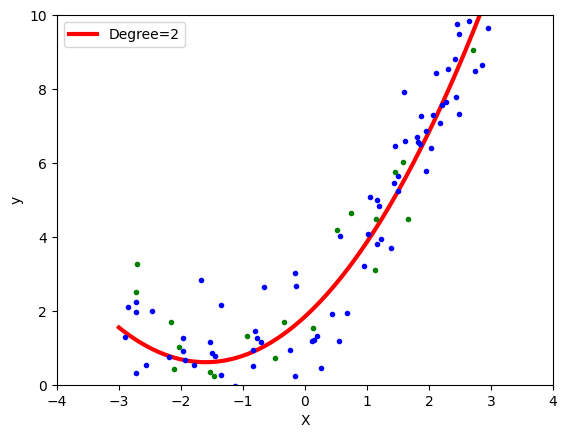

In [22]:
poly_regression(2)

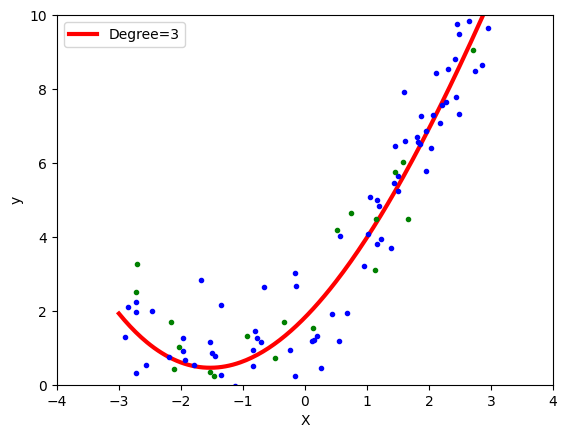

In [23]:
poly_regression(3)

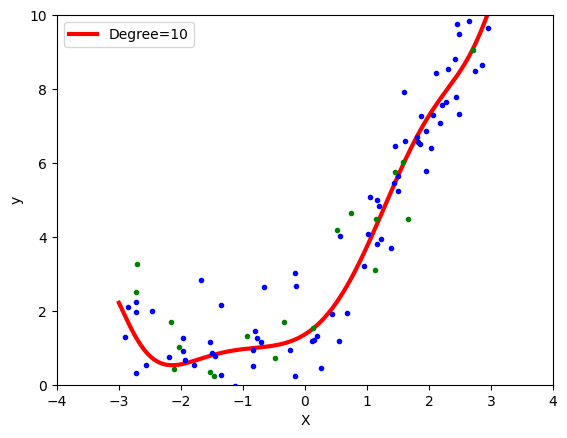

In [24]:
poly_regression(10)